# Box Plots and their uses - an investigation

## Introduction   
This project will examine the Box & Whisker Plot (commonly known as the box plot). I'll look at it's history, where & why it's used and how it compares to other ways of displaying data. I will demonstrate the use of the box plot using a dataset and explain the terminology surrounding it's use.

### History of the Box Plot
   
![John Tukey](https://upload.wikimedia.org/wikipedia/en/thumb/e/e9/John_Tukey.jpg/220px-John_Tukey.jpg)  
Box plots are best known through the work of the American mathematician, John Wilder Tukey, shown above, who introduced them in his 1977 book "Exploratory Data Analysis". 
I have, however, come across some discussion as to whether Tukey was actually the first to use them. __[This post](https://stats.stackexchange.com/questions/369393/whats-the-history-of-box-plots-and-how-did-the-box-and-whiskers-design-evolv)__ on stackexchange gives a comprehensive history. It appears that the idea of showing the median & quartiles as basic summaries predates Tukey's work, having been used by the geographer Percy Robert Crowe as far back as 1933 under the name 'dispersion diagram'. Even earlier, Arthur Lyon Bowley recommended to use minimum and maximum and 10, 25, 50, 75 and 90% points as a basis for graphical summary (1910, 1952). Range Bars, which show extremes & quartiles, are often attributed to Mary Eleanor Spear (1952), and Kenneth W. Haemer (1948). What was original about Tukey's use of the box plot was his introduction of what he called outside values or outliers. He says "It is convenient to have a rule of thumb that picks out certain values as 'outside' or 'far out'" (Tukey, 1977). He also gave them the name 'box plot'. 


### What is a boxplot
The box plot is a standardised way of displaying the distribution of data, splitting it into quartiles. Quartiles divide a dataset into four equal parts. The values that divide each part are called the first, second & third quartiles respectively. The first quartile is the 25th percentile, i.e. 25% of the data falls below this line. The second quartile is the 50th percentile, or median - 50% of the data falls below this line. The third quartile is the 75% percentile - 75% of the data falls below this line. In the simplest box plot the central rectangle spans the first quartile to the third quartile (the interquartile range or IQR). The IQR lets us know how 'spread out' the values are. A segment inside the rectangle shows the median and "whiskers" above and below the box show the locations of the minimum and maximum.  One whisker goes from the first quartile to the smallest non-outlier value (minimum), and the other goes from the third quartile to the highest non-outlier value (maximum).   
The 'outliers' are points that lie outside the expected ranges. Any value that lies more than one and a half times the length of the box from either end of the box is an outlier. 1.5 times the IQR was selected by John Tukey as the demarkation line for outliers when he wrote about the box and whisker plot in 1977, and it has been used ever since. For normal distribution data it means that usually only about one percent of the data will be outliers.   



![Simple Boxplot](http://www.physics.csbsju.edu/stats/simple.box.defs.gif)




### Use of the boxplot
Box plots allow comparison of data from different categories or groups at once, which is much more difficult with histograms. They also provide information that histograms don't, i.e. median, percentiles etc. 

I will use a dataset made up of salary information for a Third Level Institute to demonstrate the use of the boxplot. I extracted the dataset from the GMIT staff database (raw data is in the CSV file contained in the data folder in this project). When inporting the dataset below I excluded two categories of staff, as there was little or no variety in the salaries for these categories of staff, thus rendering the data unsuitable for a boxplot.   
In general, box plots are useful when comparing distributions as the centre, spread & overall range are immediately visible. You can easily see if the distribution is skewed (median line won't be in the middle of the box), and whether there are any unusual observations in the dataset (outliers).


In [3]:
#Pandas is a Python package for data frames
#Matplotlib is a Python librar for plotting
#Seaborn is a data visualisation library based on matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#Importing the dataset 
df = pd.read_csv("https://raw.githubusercontent.com/paulacduffy/boxplotsproject/master/Data/salary.csv")

#Excluding two categories: canteen & support
df = df[df.Category != "CANTEEN"]
ndf = df[df.Category != "SUPPORT"]

#Assigning Column Headings
ndf.columns = ['Category','Salary','Gender']

#Excluding data where gender is 'unknown'
ndf=ndf[ndf.Gender !="Unknown"]

#Displaying first 20 lines
ndf.head(n=20)

,Category,Salary,Gender
0,ACADEMIC,51502,Male
1,ACADEMIC,51502,Male
2,ACADEMIC,51502,Female
3,ACADEMIC,51502,Female
4,ACADEMIC,48840,Male
5,ACADEMIC,47504,Male
6,ACADEMIC,50178,Male
7,ACADEMIC,51502,Male
8,ACADEMIC,50178,Male
9,ACADEMIC,46165,Female


In [5]:
#List columns in dataframe
ndf.columns.tolist()

['Category', 'Salary', 'Gender']

In [6]:
#Show descriptive statistics of the dataframe
ndf.describe()

,Salary
count,663.000000
mean,64051.027149
std,19912.495497
min,23353.000000
25%,48840.000000
50%,61611.000000
75%,85496.000000
max,156246.000000


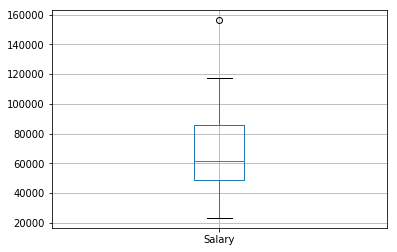

In [11]:
#Creata a simple box plot for salary
ndf.boxplot()

From this simple box plot we can clearly see the minimum salary (just over €20,000), maximum salary (just under €120,000), one outlier (just under €160,000) and median (just over €60,000). The 'maximum' and 'minimum' values in a box plot are the largest & smallest values that are not outliers. An outlier is defined by Tukey as a data point that is located outside the whiskers of the boxplot (e.g. outside 1.5 times the interquartile range above the upper quartile and below the lower quartile).

We can create a box plot by category of staff using Pandas, as shown below:

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


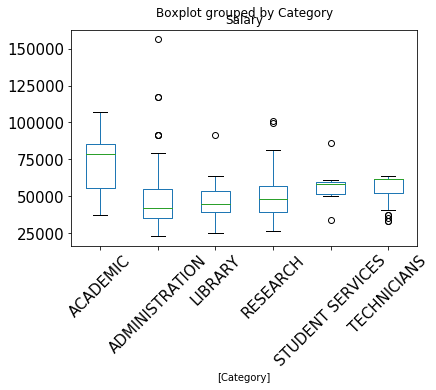

In [7]:
#Create box plot using Pandas
ndf.boxplot(by="Category", grid=False, rot=45, fontsize=15)
plt.show()


This shows the maximum, minimum, etc. broken down by category of staff. You can see the the trend in the data; the biggest spread of salaries is in the Academic category, the Administration category has significant outliers and the Student Services category has the smallest spread. Pandas doesn't, however, give us a lot of options for making the data look prettier. Seaborn is a better choice for boxplots:

<function matplotlib.pyplot.show>

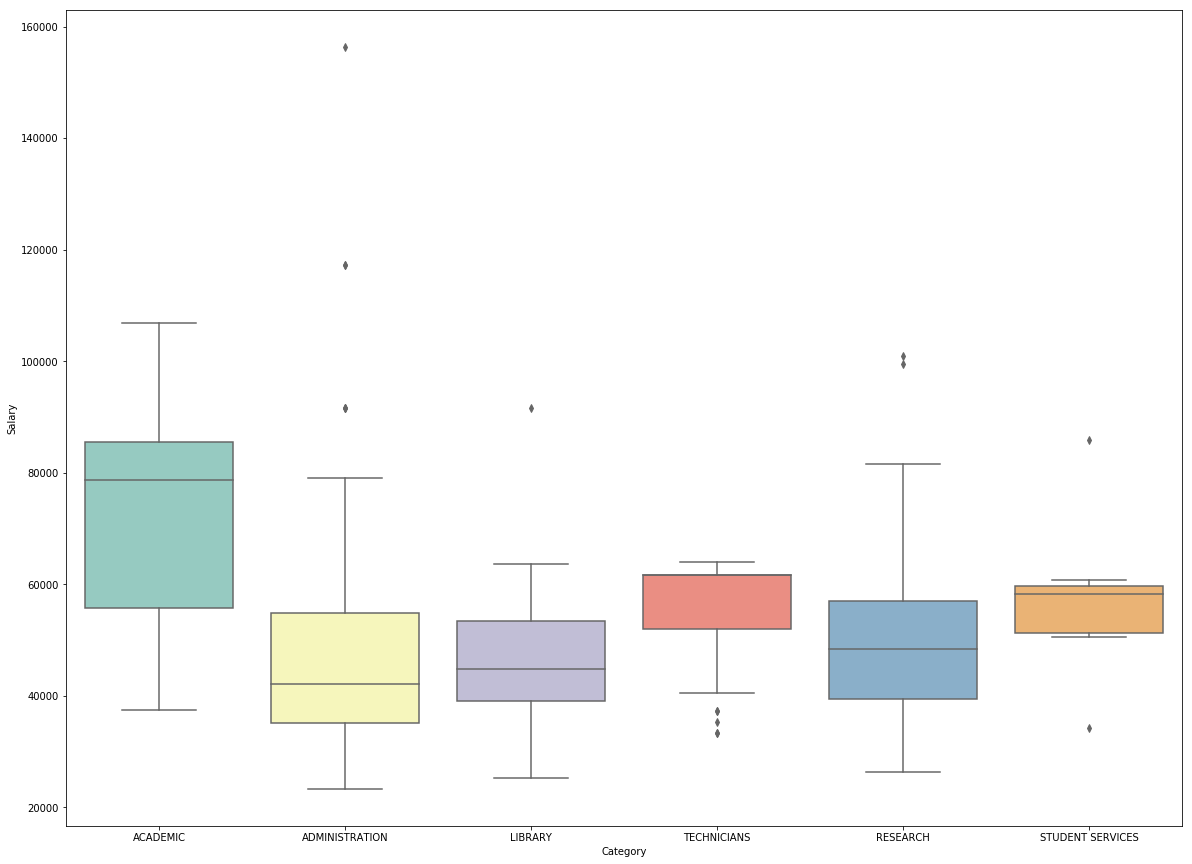

In [8]:
#Adapted from https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot
%matplotlib inline
plt.figure(figsize=(20,15))
sns.boxplot(x="Category", y="Salary", data=ndf, palette="Set3")
plt.show

Here we can clearly see the spread for each category of staff. We can see that the Administration, Academic, Libaray & Student Services categories are skewed as the median line doesn't lie in the centre of the box. Outliers are clearly shown as little circles outside the whiskers of each box plot. It is easy to see what the maximum salary & minimum salary (excluding outliers) is for each category, and which category of staff has the highest & lowest median salary.    
Boxplots can also be grouped by another column, as in the example below, where I have grouped the data by Gender. Interestingly, looking at the Administration category ungrouped by gender there are several outliers, but grouped by gender there are no outliers in the male category, and just one in the female. Similarly we can clearly see how the max/min/median changes by Gender & Category.

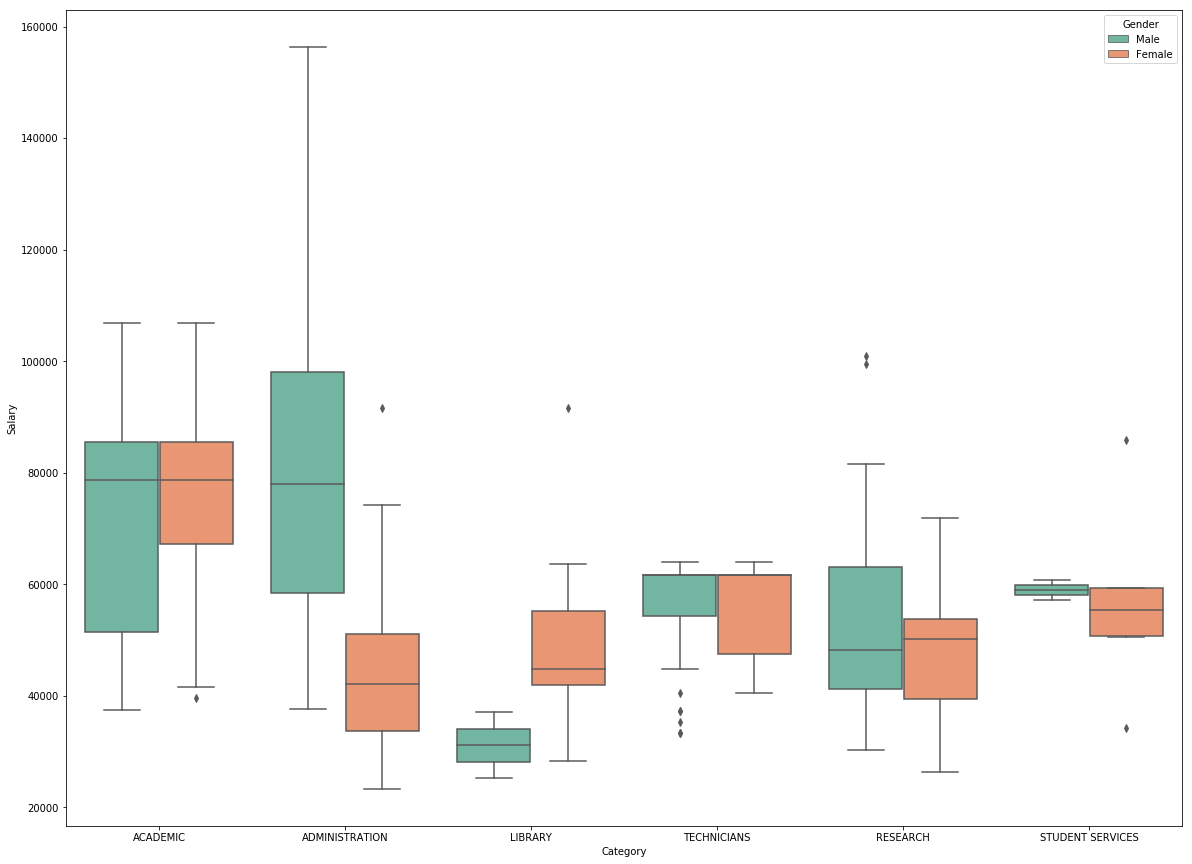

In [12]:
#Show box plots grouped by gender for each category
%matplotlib inline
plt.figure(figsize=(20,15))
sns.boxplot(x="Category", y="Salary", hue="Gender", data=ndf, palette="Set2")
plt.show()

#### Advantages of box plots   
-  Ability to handle large datasets easily. With the five point summary it is easy to see the summary of even very large datasets with a box plot.   
-  Gives a clear summary. Looking at the boxplot above one can quite easily see the varience in spread of salary between the different categories on staff, broken down by gender.   
-  Shows outliers. All categories in the example above have outliers; these would not be obvious in other types of plots, see barplot below as an example - we cannot see the spread, min values or median here.   
-  Gives an indication of the symmetry of the data, and how much it is skewed.   

#### Disadvantages of box plots   
-  Don't show a lot of the detail of the distribution, other plots are needed for a more detailed analysis.
-  Not useful where there is little variety in the data.


#### Bar plot for comparison

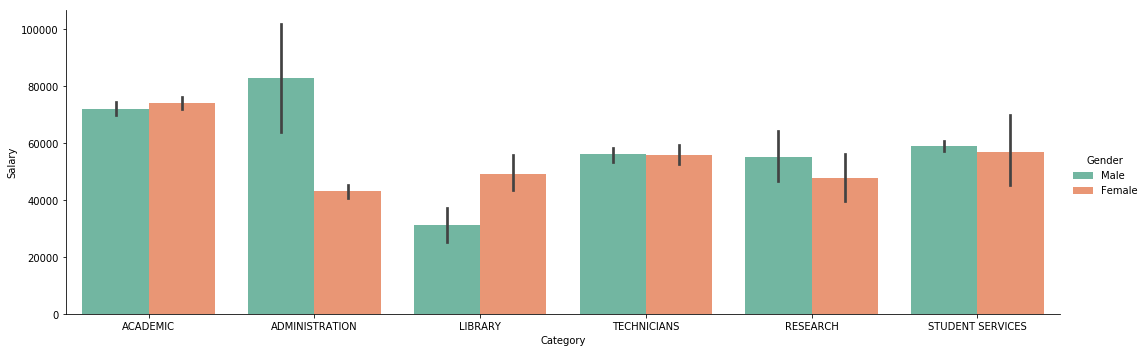

In [10]:
#Bar plot using seaborn with 'Category' on x axis & 'Salary' on y axis, separated by Gender
sns.catplot(x="Category", y="Salary", hue="Gender", kind="bar", data=ndf, aspect = 3, palette="Set2");

## References   

http://www.physics.csbsju.edu/stats/box2.html   
https://stattrek.com/statistics/dictionary.aspx?definition=boxplot   
https://www.purplemath.com/modules/boxwhisk3.htm  
Tukey, John (1977). *Exploratory Data Analysis*. Addison-Wesley, Reading MA
https://sciencing.com/advantages-disadvantages-box-plot-12025269.html   
https://www.r-statistics.com/2011/01/how-to-label-all-the-outliers-in-a-boxplot/
